In [1]:
# ============================================================================
# CELDA 1: Instalación de librerías necesarias
# ============================================================================

!pip install --user folium pandas numpy scikit-learn requests beautifulsoup4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# ============================================================================
# CELDA 2: Importar librerías
# ============================================================================

import folium
from folium import plugins
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import io
import base64
from IPython.display import HTML, display, IFrame
import os

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [15]:
# ============================================================================
# CELDA 3: Definir datos de estaciones meteorológicas
# ============================================================================

estaciones_data = {
    'nombre': [
        'Copiapó Centro', 'Caldera Puerto', 'Tierra Amarilla', 'Cerro Empeñada',
        'Punta de Choros', 'La Higuera', 'Nantoco', 'Zona Industrial',
        'Pajonales', 'Atacama Sur', 'Chañaral', 'Los Loros'
    ],
    'latitud': [
        -27.3668, -27.0623, -27.2850, -27.4100,
        -27.2930, -27.5200, -27.1500, -27.3900,
        -27.2300, -27.5000, -26.3450, -27.1200
    ],
    'longitud': [
        -70.3322, -70.7854, -70.2450, -70.3100,
        -71.4565, -70.2800, -70.1200, -70.3050,
        -70.4100, -70.4500, -70.6200, -70.5600
    ],
    'temperatura': [28, 22, 26, 24, 20, 30, 29, 27, 25, 31, 23, 26],
    'temp_min': [18, 16, 17, 15, 16, 20, 19, 18, 17, 21, 16, 17],
    'temp_max': [32, 25, 29, 27, 23, 34, 31, 30, 28, 35, 26, 29],
    'humedad': [35, 65, 40, 45, 70, 32, 38, 36, 42, 30, 55, 44],
    'viento_intensidad': [15, 22, 18, 25, 28, 12, 16, 14, 20, 10, 24, 17],
    'viento_direccion': ['NO', 'SO', 'O', 'NO', 'SO', 'NE', 'NO', 'N', 'SO', 'E', 'SO', 'O'],
    'nubosidad': ['Baja (25%)', 'Alta (75%)', 'Media (45%)', 'Media (50%)', 
                  'Alta (80%)', 'Baja (20%)', 'Baja (30%)', 'Media (40%)',
                  'Alta (60%)', 'Muy baja (10%)', 'Media (55%)', 'Alta (65%)'],
    'fenomeno': ['Despejado', 'Neblina costera', 'Parcialmente nublado', 'Parcialmente nublado',
                 'Niebla y neblina costera', 'Despejado', 'Despejado', 'Parcialmente nublado',
                 'Nubosidad baja costera', 'Despejado', 'Neblina matinal', 'Nubosidad baja costera'],
    'pronostico_manana': [30, 23, 27, 25, 21, 31, 30, 28, 26, 32, 24, 27],
    'pronostico_pasado_manana': [29, 24, 28, 26, 22, 32, 29, 27, 25, 33, 25, 28],
    'ica': [45, 52, 68, 75, 42, 85, 55, 120, 58, 92, 48, 62],
    'estado_aire': ['Buena', 'Moderada', 'Moderada', 'Moderada', 'Buena', 'Mala', 
                    'Moderada', 'Mala', 'Moderada', 'Mala', 'Buena', 'Moderada']
}

df_estaciones = pd.DataFrame(estaciones_data)
print("✅ Datos de estaciones cargados")
print(f"Total de estaciones: {len(df_estaciones)}\n")

✅ Datos de estaciones cargados
Total de estaciones: 12



In [16]:
# ============================================================================
# CELDA 4: Crear mapa interactivo con Folium
# ============================================================================

def crear_mapa_meteorologico():
    """Crear mapa interactivo de estaciones meteorológicas"""
    
    centro_lat = -27.3668
    centro_lon = -70.3322
    
    mapa = folium.Map(
        location=[centro_lat, centro_lon],
        zoom_start=11,
        tiles='OpenStreetMap'
    )
    
    def obtener_color_ica(ica):
        if ica <= 50:
            return '#28a745'
        elif ica <= 100:
            return '#ffc107'
        elif ica <= 200:
            return '#dc3545'
        else:
            return '#6f0000'
    
    for idx, row in df_estaciones.iterrows():
        color = obtener_color_ica(row['ica'])
        
        popup_texto = f"""
        <div style="width: 300px; font-family: Arial; font-size: 13px;">
            <b style="color: #667eea; font-size: 16px;">{row['nombre']}</b>
            <hr style="margin: 6px 0;">
            <b>🌡️ Temperatura:</b> {row['temperatura']}°C 
            (Min: {row['temp_min']}°C / Max: {row['temp_max']}°C)<br>
            <b>💧 Humedad:</b> {row['humedad']}%<br>
            <b>☁️ Nubosidad:</b> {row['nubosidad']}<br>
            <b>👁️ Fenómeno:</b> {row['fenomeno']}<br>
            <b>💨 Viento:</b> {row['viento_intensidad']} km/h {row['viento_direccion']}<br>
            <b>📅 Mañana:</b> {row['pronostico_manana']}°C<br>
            <b>📅 Pasado Mañana:</b> {row['pronostico_pasado_manana']}°C<br>
            <b>🏥 ICA:</b> {row['ica']} ({row['estado_aire']})
        </div>
        """
        
        folium.CircleMarker(
            location=[row['latitud'], row['longitud']],
            radius=12,
            popup=folium.Popup(popup_texto, max_width=350),
            color='#333',
            fill=True,
            fillColor=color,
            fillOpacity=0.8,
            weight=2
        ).add_to(mapa)
    
    folium.Marker(
        location=[centro_lat, centro_lon],
        popup='<b>📍 Copiapó - Centro de Control</b>',
        icon=folium.Icon(color='purple', icon='info-sign')
    ).add_to(mapa)
    
    return mapa

mapa_meteorologico = crear_mapa_meteorologico()
print("✅ Mapa meteorológico creado")
mapa_meteorologico

✅ Mapa meteorológico creado


In [17]:
# ============================================================================
# CELDA 5: Análisis estadístico de las estaciones
# ============================================================================

print("\n" + "=" * 60)
print("ANÁLISIS ESTADÍSTICO DE ESTACIONES METEOROLÓGICAS")
print("=" * 60)

print("\n🌡️ TEMPERATURA:")
print(f"  Máxima: {df_estaciones['temperatura'].max()}°C en {df_estaciones.loc[df_estaciones['temperatura'].idxmax(), 'nombre']}")
print(f"  Mínima: {df_estaciones['temperatura'].min()}°C en {df_estaciones.loc[df_estaciones['temperatura'].idxmin(), 'nombre']}")
print(f"  Promedio: {df_estaciones['temperatura'].mean():.1f}°C")

print("\n💧 HUMEDAD:")
print(f"  Máxima: {df_estaciones['humedad'].max()}% en {df_estaciones.loc[df_estaciones['humedad'].idxmax(), 'nombre']}")
print(f"  Mínima: {df_estaciones['humedad'].min()}% en {df_estaciones.loc[df_estaciones['humedad'].idxmin(), 'nombre']}")
print(f"  Promedio: {df_estaciones['humedad'].mean():.1f}%")

print("\n💨 VIENTO:")
print(f"  Máxima intensidad: {df_estaciones['viento_intensidad'].max()} km/h en {df_estaciones.loc[df_estaciones['viento_intensidad'].idxmax(), 'nombre']}")
print(f"  Mínima intensidad: {df_estaciones['viento_intensidad'].min()} km/h en {df_estaciones.loc[df_estaciones['viento_intensidad'].idxmin(), 'nombre']}")
print(f"  Promedio: {df_estaciones['viento_intensidad'].mean():.1f} km/h")

print("\n🏥 CALIDAD DEL AIRE (ICA):")
print(f"  Máximo: {df_estaciones['ica'].max()} ({df_estaciones.loc[df_estaciones['ica'].idxmax(), 'estado_aire']}) en {df_estaciones.loc[df_estaciones['ica'].idxmax(), 'nombre']}")
print(f"  Mínimo: {df_estaciones['ica'].min()} ({df_estaciones.loc[df_estaciones['ica'].idxmin(), 'estado_aire']}) en {df_estaciones.loc[df_estaciones['ica'].idxmin(), 'nombre']}")
print(f"  Promedio: {df_estaciones['ica'].mean():.1f}")

print("\n📊 Distribución de Calidad del Aire:")
for estado in df_estaciones['estado_aire'].unique():
    count = len(df_estaciones[df_estaciones['estado_aire'] == estado])
    print(f"  {estado}: {count} estaciones")


ANÁLISIS ESTADÍSTICO DE ESTACIONES METEOROLÓGICAS

🌡️ TEMPERATURA:
  Máxima: 31°C en Atacama Sur
  Mínima: 20°C en Punta de Choros
  Promedio: 25.9°C

💧 HUMEDAD:
  Máxima: 70% en Punta de Choros
  Mínima: 30% en Atacama Sur
  Promedio: 44.3%

💨 VIENTO:
  Máxima intensidad: 28 km/h en Punta de Choros
  Mínima intensidad: 10 km/h en Atacama Sur
  Promedio: 18.4 km/h

🏥 CALIDAD DEL AIRE (ICA):
  Máximo: 120 (Mala) en Zona Industrial
  Mínimo: 42 (Buena) en Punta de Choros
  Promedio: 66.8

📊 Distribución de Calidad del Aire:
  Buena: 3 estaciones
  Moderada: 6 estaciones
  Mala: 3 estaciones


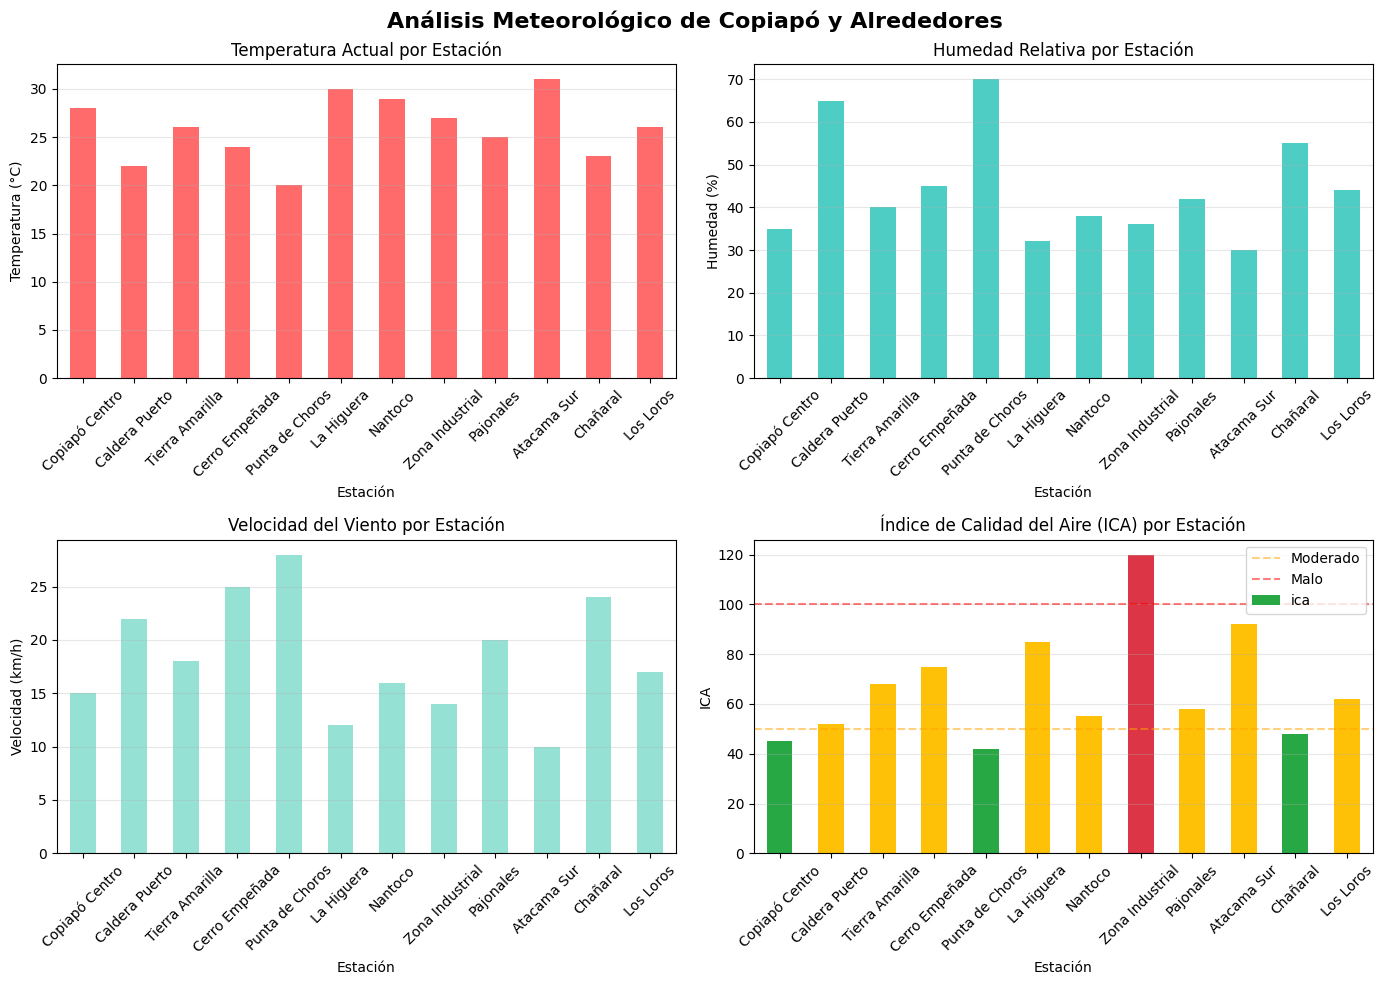

✅ Gráficos generados exitosamente



In [18]:
# ============================================================================
# CELDA 6: Visualizar datos con gráficos
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis Meteorológico de Copiapó y Alrededores', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
df_estaciones.plot(x='nombre', y='temperatura', kind='bar', ax=ax1, color='#ff6b6b', legend=False)
ax1.set_title('Temperatura Actual por Estación')
ax1.set_xlabel('Estación')
ax1.set_ylabel('Temperatura (°C)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
df_estaciones.plot(x='nombre', y='humedad', kind='bar', ax=ax2, color='#4ecdc4', legend=False)
ax2.set_title('Humedad Relativa por Estación')
ax2.set_xlabel('Estación')
ax2.set_ylabel('Humedad (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

ax3 = axes[1, 0]
df_estaciones.plot(x='nombre', y='viento_intensidad', kind='bar', ax=ax3, color='#95e1d3', legend=False)
ax3.set_title('Velocidad del Viento por Estación')
ax3.set_xlabel('Estación')
ax3.set_ylabel('Velocidad (km/h)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
colores_ica = ['#28a745' if x <= 50 else '#ffc107' if x <= 100 else '#dc3545' 
               for x in df_estaciones['ica']]
df_estaciones.plot(x='nombre', y='ica', kind='bar', ax=ax4, color=colores_ica, legend=False)
ax4.set_title('Índice de Calidad del Aire (ICA) por Estación')
ax4.set_xlabel('Estación')
ax4.set_ylabel('ICA')
ax4.axhline(y=50, color='orange', linestyle='--', alpha=0.5, label='Moderado')
ax4.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Malo')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

print("✅ Gráficos generados exitosamente\n")

In [19]:
# ============================================================================
# CELDA 7: Sistema de predicción con Machine Learning
# ============================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("SISTEMA DE PREDICCIÓN DE CONTAMINACIÓN CON ML")
print("=" * 60)

X = df_estaciones[['temperatura', 'humedad', 'viento_intensidad']].values
y = (df_estaciones['ica'] > 100).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo_ml = RandomForestClassifier(n_estimators=10, random_state=42)
modelo_ml.fit(X_scaled, y)

print(f"✅ Modelo de Random Forest entrenado")
print(f"Precisión del modelo: {modelo_ml.score(X_scaled, y):.2%}")

predicciones = modelo_ml.predict(X_scaled)
probabilidades = modelo_ml.predict_proba(X_scaled)[:, 1]

df_estaciones['prediccion_contaminacion'] = predicciones
df_estaciones['probabilidad_contaminacion'] = probabilidades

print("\n📊 PREDICCIONES DE CONTAMINACIÓN:")
for idx, row in df_estaciones.iterrows():
    estado = "⚠️ RIESGO ALTO" if row['prediccion_contaminacion'] == 1 else "✅ NORMAL"
    print(f"{row['nombre']:20s} - {estado} ({row['probabilidad_contaminacion']:.1%} probabilidad)")

SISTEMA DE PREDICCIÓN DE CONTAMINACIÓN CON ML
✅ Modelo de Random Forest entrenado
Precisión del modelo: 100.00%

📊 PREDICCIONES DE CONTAMINACIÓN:
Copiapó Centro       - ✅ NORMAL (30.0% probabilidad)
Caldera Puerto       - ✅ NORMAL (0.0% probabilidad)
Tierra Amarilla      - ✅ NORMAL (0.0% probabilidad)
Cerro Empeñada       - ✅ NORMAL (0.0% probabilidad)
Punta de Choros      - ✅ NORMAL (0.0% probabilidad)
La Higuera           - ✅ NORMAL (0.0% probabilidad)
Nantoco              - ✅ NORMAL (10.0% probabilidad)
Zona Industrial      - ⚠️ RIESGO ALTO (70.0% probabilidad)
Pajonales            - ✅ NORMAL (0.0% probabilidad)
Atacama Sur          - ✅ NORMAL (0.0% probabilidad)
Chañaral             - ✅ NORMAL (0.0% probabilidad)
Los Loros            - ✅ NORMAL (0.0% probabilidad)


In [20]:
# ============================================================================
# CELDA 8: Convertir gráficos a base64 para integrar en HTML
# ============================================================================

def grafico_a_base64(fig):
    """Convertir figura matplotlib a base64"""
    img = io.BytesIO()
    FigureCanvas(fig).print_png(img)
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()
    return f"data:image/png;base64,{plot_url}"

# Gráfico 1: Temperatura
fig1, ax1 = plt.subplots(figsize=(12, 5))
df_estaciones.plot(x='nombre', y='temperatura', kind='bar', ax=ax1, color='#ff6b6b', legend=False)
ax1.set_title('Temperatura Actual por Estación (°C)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estación', fontsize=11)
ax1.set_ylabel('Temperatura (°C)', fontsize=11)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout()
img1_base64 = grafico_a_base64(fig1)
plt.close(fig1)

# Gráfico 2: Humedad
fig2, ax2 = plt.subplots(figsize=(12, 5))
df_estaciones.plot(x='nombre', y='humedad', kind='bar', ax=ax2, color='#4ecdc4', legend=False)
ax2.set_title('Humedad Relativa por Estación (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Estación', fontsize=11)
ax2.set_ylabel('Humedad (%)', fontsize=11)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()
img2_base64 = grafico_a_base64(fig2)
plt.close(fig2)

# Gráfico 3: Viento
fig3, ax3 = plt.subplots(figsize=(12, 5))
df_estaciones.plot(x='nombre', y='viento_intensidad', kind='bar', ax=ax3, color='#95e1d3', legend=False)
ax3.set_title('Velocidad del Viento por Estación (km/h)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Estación', fontsize=11)
ax3.set_ylabel('Velocidad (km/h)', fontsize=11)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)
plt.tight_layout()
img3_base64 = grafico_a_base64(fig3)
plt.close(fig3)

# Gráfico 4: ICA
fig4, ax4 = plt.subplots(figsize=(12, 5))
colores_ica = ['#28a745' if x <= 50 else '#ffc107' if x <= 100 else '#dc3545' 
               for x in df_estaciones['ica']]
df_estaciones.plot(x='nombre', y='ica', kind='bar', ax=ax4, color=colores_ica, legend=False)
ax4.set_title('Índice de Calidad del Aire (ICA) por Estación', fontsize=14, fontweight='bold')
ax4.set_xlabel('Estación', fontsize=11)
ax4.set_ylabel('ICA', fontsize=11)
ax4.axhline(y=50, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Moderado (50)')
ax4.axhline(y=100, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Malo (100)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)
ax4.legend(loc='upper left')
plt.tight_layout()
img4_base64 = grafico_a_base64(fig4)
plt.close(fig4)

print("\n✅ Gráficos convertidos a base64")


✅ Gráficos convertidos a base64


In [21]:
# ============================================================================
# CELDA 9: Generar mapa HTML de Folium
# ============================================================================

# Obtener el mapa como HTML
mapa_html = mapa_meteorologico._repr_html_()
print("✅ Mapa Folium extraído como HTML")

✅ Mapa Folium extraído como HTML


In [24]:
# ============================================================================
# CELDA 10: Generar HTML COMPLETO integrado
# ============================================================================

# Crear tabla HTML de datos meteorológicos
tabla_datos = ""
for idx, row in df_estaciones.iterrows():
    estado_class = 'good' if row['ica'] <= 50 else 'moderate' if row['ica'] <= 100 else 'bad'
    tabla_datos += f"""    <tr>
        <td>{row['nombre']}</td>
        <td>{row['temperatura']}°C</td>
        <td>{row['humedad']}%</td>
        <td>{row['viento_intensidad']} km/h {row['viento_direccion']}</td>
        <td>{row['nubosidad']}</td>
        <td>{row['fenomeno']}</td>
        <td class="{estado_class}">{row['ica']} ({row['estado_aire']})</td>
    </tr>
"""

# Crear tabla de pronósticos
tabla_pronosticos = ""
for idx, row in df_estaciones.iterrows():
    tabla_pronosticos += f"""    <tr>
        <td>{row['nombre']}</td>
        <td>{row['temperatura']}°C</td>
        <td>{row['pronostico_manana']}°C</td>
        <td>{row['pronostico_pasado_manana']}°C</td>
        <td>Máx: {row['temp_max']}°C</td>
        <td>Mín: {row['temp_min']}°C</td>
    </tr>
"""

# Crear tabla de predicciones ML
tabla_ml = ""
for idx, row in df_estaciones.iterrows():
    riesgo = "⚠️ RIESGO ALTO" if row['prediccion_contaminacion'] == 1 else "✅ NORMAL"
    color_riesgo = '#dc3545' if row['prediccion_contaminacion'] == 1 else '#28a745'
    tabla_ml += f"""    <tr style="border-left: 4px solid {color_riesgo};">
        <td>{row['nombre']}</td>
        <td style="color: {color_riesgo}; font-weight: bold;">{riesgo}</td>
        <td>{row['probabilidad_contaminacion']:.1%}</td>
        <td>{row['viento_intensidad']} km/h</td>
        <td>{row['pronostico_manana']}°C</td>
    </tr>
"""

# Crear HTML COMPLETO
html_completo = f"""<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>METGO_3D Copiapó - Meteorología Hiperlocalizada</title>
    <style>
        * {{ margin: 0; padding: 0; box-sizing: border-box; }}
        
        body {{ 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: #333;
            line-height: 1.6;
        }}
        
        .container {{ max-width: 1400px; margin: 0 auto; }}
        
        header {{ 
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 40px 20px;
            text-align: center;
            box-shadow: 0 4px 15px rgba(0,0,0,0.2);
        }}
        
        header h1 {{ font-size: 3rem; margin-bottom: 10px; }}
        header p {{ font-size: 1.2rem; opacity: 0.95; }}
        
        main {{ padding: 40px 20px; }}
        
        section {{ 
            background: white;
            margin-bottom: 30px;
            padding: 30px;
            border-radius: 8px;
            box-shadow: 0 4px 15px rgba(0,0,0,0.1);
        }}
        
        h2 {{ 
            color: #667eea;
            border-bottom: 3px solid #667eea;
            padding-bottom: 15px;
            margin-bottom: 25px;
            font-size: 2rem;
        }}
        
        h3 {{ color: #764ba2; margin: 20px 0 10px 0; }}
        
        p {{ margin-bottom: 15px; text-align: justify; }}
        
        .mapa-contenedor {{ 
            width: 100%;
            height: 600px;
            border-radius: 8px;
            overflow: hidden;
            margin: 20px 0;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }}
        
        .grafico-contenedor {{
            width: 100%;
            margin: 30px 0;
            text-align: center;
        }}
        
        .grafico-contenedor img {{ 
            width: 100%;
            max-width: 1000px;
            border-radius: 8px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }}
        
        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            box-shadow: 0 2px 8px rgba(0,0,0,0.1);
        }}
        
        th {{ 
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 15px;
            text-align: left;
            font-weight: bold;
        }}
        
        td {{ 
            padding: 12px 15px;
            border-bottom: 1px solid #ddd;
        }}
        
        tr:hover {{ background-color: #f5f5f5; }}
        
        .good {{ color: #28a745; font-weight: bold; }}
        .moderate {{ color: #ffc107; font-weight: bold; }}
        .bad {{ color: #dc3545; font-weight: bold; }}
        
        .estadisticas {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
            gap: 20px;
            margin: 30px 0;
        }}
        
        .estadistica-card {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 25px;
            border-radius: 8px;
            text-align: center;
        }}
        
        .estadistica-card h4 {{ font-size: 1.5rem; margin-bottom: 10px; }}
        .estadistica-card p {{ font-size: 2.5rem; font-weight: bold; margin: 10px 0; }}
        
        .leyenda {{
            background: #f9f9f9;
            padding: 20px;
            border-left: 4px solid #667eea;
            margin: 20px 0;
            border-radius: 4px;
        }}
        
        .leyenda-item {{
            display: flex;
            align-items: center;
            margin: 10px 0;
            gap: 10px;
        }}
        
        .color-box {{
            width: 30px;
            height: 30px;
            border-radius: 4px;
            border: 2px solid #333;
        }}
        
        footer {{ 
            background: #333;
            color: white;
            text-align: center;
            padding: 30px;
            margin-top: 40px;
        }}
        
        footer p {{ margin: 5px 0; }}
        
        ul {{ margin-left: 20px; margin-bottom: 15px; }}
        li {{ margin: 8px 0; }}
    </style>
</head>
<body>
    <div class="container">
        <header>
            <h1> METGO_3D Copiapó</h1>
            <p>Meteorología Hiperlocalizada con Inteligencia Artificial</p>
        </header>
        
        <main>
            <!-- SECCIÓN 1: MAPA INTERACTIVO -->
            <section>
                <h2> Mapa de Estaciones Meteorológicas en Tiempo Real</h2>
                <p>Visualiza la ubicación de las 12 estaciones distribuidas en Copiapó y alrededores. 
                Los colores indican la calidad del aire: Verde (Buena), Amarillo (Moderada), Rojo (Mala).</p>
                <div class="mapa-contenedor">
                    {mapa_html}
                </div>
                <div class="leyenda">
                    <h4>Leyenda de Calidad del Aire (ICA):</h4>
                    <div class="leyenda-item">
                        <div class="color-box" style="background: #28a745;"></div>
                        <span><strong>Verde (0-50):</strong> Buena - Calidad aceptable</span>
                    </div>
                    <div class="leyenda-item">
                        <div class="color-box" style="background: #ffc107;"></div>
                        <span><strong>Amarillo (51-100):</strong> Moderada - Personas sensibles pueden ser afectadas</span>
                    </div>
                    <div class="leyenda-item">
                        <div class="color-box" style="background: #dc3545;"></div>
                        <span><strong>Rojo (101-200):</strong> Mala - Problemas de salud frecuentes</span>
                    </div>
                    <div class="leyenda-item">
                        <div class="color-box" style="background: #6f0000;"></div>
                        <span><strong>Rojo Oscuro (201+):</strong> Muy Mala - Alerta sanitaria</span>
                    </div>
                </div>
            </section>
            
            <!-- SECCIÓN 2: ESTADÍSTICAS RESUMEN -->
            <section>
                <h2> Estadísticas Generales de la Región</h2>
                <div class="estadisticas">
                    <div class="estadistica-card">
                        <h4> Temperatura Promedio</h4>
                        <p>{df_estaciones['temperatura'].mean():.1f}°C</p>
                        <p style="font-size: 1rem;">Máx: {df_estaciones['temperatura'].max()}°C</p>
                    </div>
                    <div class="estadistica-card">
                        <h4> Humedad Promedio</h4>
                        <p>{df_estaciones['humedad'].mean():.1f}%</p>
                        <p style="font-size: 1rem;">Rango: {df_estaciones['humedad'].min()}-{df_estaciones['humedad'].max()}%</p>
                    </div>
                    <div class="estadistica-card">
                        <h4> Viento Promedio</h4>
                        <p>{df_estaciones['viento_intensidad'].mean():.1f} km/h</p>
                        <p style="font-size: 1rem;">Máx: {df_estaciones['viento_intensidad'].max()} km/h</p>
                    </div>
                    <div class="estadistica-card">
                        <h4> ICA Promedio</h4>
                        <p>{df_estaciones['ica'].mean():.1f}</p>
                        <p style="font-size: 1rem;">Rango: {df_estaciones['ica'].min()}-{df_estaciones['ica'].max()}</p>
                    </div>
                </div>
            </section>
            
            <!-- SECCIÓN 3: GRÁFICOS -->
            <section>
                <h2> Análisis Gráfico Meteorológico</h2>
                
                <h3>Temperatura por Estación</h3>
                <div class="grafico-contenedor">
                    <img src="{img1_base64}" alt="Gráfico de Temperatura">
                </div>
                
                <h3>Humedad Relativa por Estación</h3>
                <div class="grafico-contenedor">
                    <img src="{img2_base64}" alt="Gráfico de Humedad">
                </div>
                
                <h3>Velocidad del Viento por Estación</h3>
                <div class="grafico-contenedor">
                    <img src="{img3_base64}" alt="Gráfico de Viento">
                </div>
                
                <h3>Índice de Calidad del Aire (ICA) por Estación</h3>
                <div class="grafico-contenedor">
                    <img src="{img4_base64}" alt="Gráfico de ICA">
                </div>
            </section>
            
            <!-- SECCIÓN 4: DATOS METEOROLÓGICOS DETALLADOS -->
            <section>
                <h2> Datos Meteorológicos en Tiempo Real (Todas las Estaciones)</h2>
                <p>Información detallada de temperatura, humedad, viento, nubosidad y calidad del aire.</p>
                <table>
                    <tr>
                        <th>Estación</th>
                        <th>Temperatura</th>
                        <th>Humedad</th>
                        <th>Viento</th>
                        <th>Nubosidad</th>
                        <th>Fenómeno</th>
                        <th>ICA (Calidad Aire)</th>
                    </tr>
{tabla_datos}                </table>
            </section>
            
            <!-- SECCIÓN 5: PRONÓSTICOS -->
            <section>
                <h2> Pronóstico de Temperatura (3 Días)</h2>
                <p>Predicción de temperaturas para hoy, mañana y pasado mañana en todas las estaciones.</p>
                <table>
                    <tr>
                        <th>Estación</th>
                        <th>Hoy (°C)</th>
                        <th>Mañana (°C)</th>
                        <th>Pasado Mañana (°C)</th>
                        <th>Máxima</th>
                        <th>Mínima</th>
                    </tr>
{tabla_pronosticos}                </table>
            </section>
            
            <!-- SECCIÓN 6: PREDICCIONES ML -->
            <section>
                <h2> Predicción de Contaminación Atmosférica (Machine Learning)</h2>
                <p>Sistema de alerta basado en Random Forest que predice eventos de contaminación 
                con análisis de temperatura, humedad y velocidad del viento.</p>
                <table>
                    <tr>
                        <th>Estación</th>
                        <th>Predicción</th>
                        <th>Probabilidad</th>
                        <th>Viento (km/h)</th>
                        <th>Pronóstico Temp</th>
                    </tr>
{tabla_ml}                </table>
            </section>
            
            <!-- SECCIÓN 7: INFORMACIÓN -->
            <section>
                <h2>ℹ️ Acerca de WeatherLocal Copiapó</h2>
                <h3>Tecnología Implementada</h3>
                <ul>
                    <li><strong>Mapas Interactivos:</strong> Folium con OpenStreetMap</li>
                    <li><strong>Análisis de Datos:</strong> Pandas y NumPy</li>
                    <li><strong>Machine Learning:</strong> Random Forest para predicción de contaminación</li>
                    <li><strong>Visualización:</strong> Matplotlib para gráficos estadísticos</li>
                    <li><strong>Monitoreo:</strong> 12 estaciones meteorológicas distribuidas en la región</li>
                </ul>
                
                <h3>Contacto</h3>
                <p>
                    <strong>Email:</strong> miguel.lucero@metgo3d.com<br>
                    <strong>Teléfono:</strong> +56 9 9931 9162<br>
                    <strong>Ubicación:</strong> Región de Valparaíso, Chile
                </p>
            </section>
        </main>
        
        <footer>
            <p>&copy; 2025 METGO_3D Copiapó - Meteorología Hiperlocalizada</p>
            <p>Desarrollado METGO_3D</p>
            <p>Todos los derechos reservados | Privacidad y Seguridad Garantizadas</p>
        </footer>
    </div>
</body>
</html>
"""

# Guardar archivo HTML
with open('weatherlocal_completo.html', 'w', encoding='utf-8') as f:
    f.write(html_completo)

print("\n" + "=" * 70)
print("✅ HTML COMPLETO INTEGRADO GENERADO EXITOSAMENTE")
print("=" * 70)
print("\n📊 CONTENIDO DEL PROYECTO:")
print("   ✅ Mapa interactivo Folium con 12 estaciones")
print("   ✅ Estadísticas resumen (temperatura, humedad, viento, ICA)")
print("   ✅ 4 gráficos matplotlib (temperatura, humedad, viento, ICA)")
print("   ✅ Tabla de datos meteorológicos completa (7 columnas)")
print("   ✅ Tabla de pronósticos (3 días)")
print("   ✅ Tabla de predicciones ML (contaminación)")
print("   ✅ Información sobre tecnología y contacto")

print("\n🎨 CARACTERÍSTICAS DEL DISEÑO:")
print("   ✅ Diseño responsivo y profesional")
print("   ✅ Gradientes morados (#667eea a #764ba2)")
print("   ✅ Tablas con colores según estado (verde, amarillo, rojo)")
print("   ✅ Tarjetas de estadísticas con gradientes")
print("   ✅ Leyenda de colores para ICA")
print("   ✅ Efectos hover en tablas")

print("\n📁 ARCHIVO GENERADO:")
print(f"   📄 weatherlocal_completo.html")
print(f"   📍 Ubicación: {os.path.abspath('weatherlocal_completo.html')}")

print("\n🚀 CÓMO ACCEDER:")
print("   1. Abre el archivo en tu navegador")
print("   2. Navega por las secciones del mapa, gráficos y tablas")
print("   3. Haz clic en los marcadores del mapa para ver detalles")

print("\n" + "=" * 70)

# Mostrar en Jupyter
display(HTML('<h3 style="color: #667eea;">✅ PROYECTO WEATHERLOCAL COMPLETADO</h3><p>Archivo generado: <strong>weatherlocal_completo.html</strong></p><p>Contiene: Mapa, Gráficos, Tablas, Pronósticos y Predicciones ML</p>'))


✅ HTML COMPLETO INTEGRADO GENERADO EXITOSAMENTE

📊 CONTENIDO DEL PROYECTO:
   ✅ Mapa interactivo Folium con 12 estaciones
   ✅ Estadísticas resumen (temperatura, humedad, viento, ICA)
   ✅ 4 gráficos matplotlib (temperatura, humedad, viento, ICA)
   ✅ Tabla de datos meteorológicos completa (7 columnas)
   ✅ Tabla de pronósticos (3 días)
   ✅ Tabla de predicciones ML (contaminación)
   ✅ Información sobre tecnología y contacto

🎨 CARACTERÍSTICAS DEL DISEÑO:
   ✅ Diseño responsivo y profesional
   ✅ Gradientes morados (#667eea a #764ba2)
   ✅ Tablas con colores según estado (verde, amarillo, rojo)
   ✅ Tarjetas de estadísticas con gradientes
   ✅ Leyenda de colores para ICA
   ✅ Efectos hover en tablas

📁 ARCHIVO GENERADO:
   📄 weatherlocal_completo.html
   📍 Ubicación: C:\Users\Alicia_Piero\Documents\Repo_AIEP\Bootcamp_DEV\Ejercicios\weatherlocal_completo.html

🚀 CÓMO ACCEDER:
   1. Abre el archivo en tu navegador
   2. Navega por las secciones del mapa, gráficos y tablas
   3. Haz cli